In [4]:
import glob

import numpy as np
import pandas as pd
from scipy import signal

import librosa
import librosa.display as DSP
import librosa as lr
from tempfile import mktemp
import imagehash
from PIL import Image

import pylab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import os
import wave
import time
import pickle
import warnings
import numpy as np
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import f1_score
import joblib

In [5]:
def calculate_delta(array):
   
    rows, cols = array.shape
    # print(rows)
    # print(cols)
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first =0
            else:
                first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    print(deltas)
    return deltas

In [6]:
def extract_features(audio,rate):
       
    mfcc_feature = mfcc.mfcc(audio, rate, 0.025, 0.01, 20, nfft = 1200, appendEnergy = True)    
    mfcc_feature = preprocessing.scale(mfcc_feature)
#     print(mfcc_feature)
    delta = calculate_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature, delta)) 
    return combined

In [7]:
X_test = []
y_test = []

lstFolders = ['amira', 'ezzat', 'mariam', 'osama']
for lst in lstFolders:
    listFiles = glob.glob(r"Training Data\{}\*".format(lst))
    features = np.asarray(())
    finishCounter = len(listFiles)
    counter = 1
    for file in listFiles:
        try:
            audio, sr = librosa.load(file)
            vector = extract_features(audio, sr)
            
            if features.size == 0:
                features = vector
            else:
                features = np.vstack((features, vector))
                
            X_test.append(vector)
            y_test.append(lstFolders.index(lst))
                
            counter += 1
            if(counter == finishCounter):
                gmm = GaussianMixture(n_components = 6, max_iter = 200, covariance_type='diag', n_init = 3)
                gmm.fit(features)
                
                # dumping the trained gaussian model
                picklefile = lst + ".joblib"
                joblib.dump(gmm, picklefile) 
        except:
            continue

[[ 1.47136754  0.48651687 -0.63398484 ...  0.38258076  0.00338487
  -0.13693898]
 [ 1.50605511  0.50189215 -0.56156388 ...  0.39625853  0.1766196
  -0.0449504 ]
 [ 1.05140685  0.48925977 -0.13995647 ...  0.22226489  0.31534674
  -0.01767891]
 ...
 [-0.047919   -0.25138498  0.02259317 ...  0.12418776  0.1157486
   0.39691892]
 [-0.05214299 -0.25319932 -0.01867998 ...  0.27560654  0.18480457
   0.28043151]
 [-0.04537511 -0.17103398 -0.01225073 ...  0.27080592  0.19173607
   0.11544443]]
[[ 1.13442727 -0.48812367  0.0060139  ...  0.38590478  0.28875883
  -0.12255004]
 [ 1.20138372 -0.24131841  0.11575455 ...  0.27649027 -0.07642372
  -0.26760938]
 [ 0.89456965  0.24993363  0.32494603 ... -0.09687735 -0.32835323
  -0.20817907]
 ...
 [ 0.00429972 -0.10495384 -0.14585427 ... -0.09773235 -0.16735843
   0.03974961]
 [ 0.01783608 -0.03626918 -0.1075265  ...  0.04159565 -0.18519797
  -0.08413092]
 [ 0.02164791  0.03332338 -0.02657401 ...  0.05849723 -0.1379807
  -0.14857636]]
[[ 6.58934695e-01 -

In [8]:
gmm_files = [ i + '.joblib' for i in ['amira', 'ezzat', 'mariam', 'osama']]

models    = [joblib.load(fname) for fname in gmm_files]


In [9]:
final_y = []
y = []
for i in X_test:
    log_likelihood = np.zeros(len(models)) 
    for j in range(len(models)):
        gmm = models[j] 
        
        scores = np.array(gmm.score(i))
        log_likelihood[j] = scores.sum()
    y.append(log_likelihood)

    winner = np.argmax(log_likelihood)
    final_y.append(winner)

In [10]:
f1_score(final_y, y_test, average='micro')

1.0

In [11]:
print(len(y))

144


144


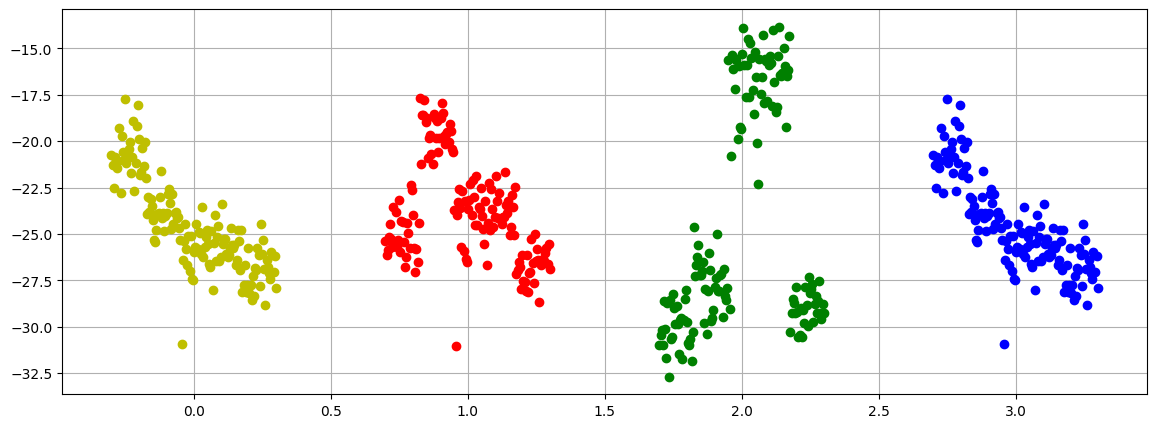

In [12]:

import matplotlib.pylab as plt
import csv
amira=[]
ezzat=[]
mar=[]
osama=[]
for i in range(144):
    x=np.array(y[i])
    amira.append(x[0])
    ezzat.append(x[1])
    mar.append(x[2])
    osama.append(x[3])

print(len(amira))


amiraRang=np.linspace(-.3, .3, num=144)
ezzatRange=np.linspace(.7, 1.3 ,num=144)
marRange=np.linspace( 1.7,2.3 ,num=144)
osamaRange=np.linspace(2.7 ,3.3  ,num=144)
plt.figure(figsize=(14, 5))
plt.plot(amiraRang ,amira , 'yo')
plt.plot(ezzatRange ,ezzat , 'ro')
plt.plot(marRange ,mar , 'go')
plt.plot(osamaRange ,amira , 'bo')

plt.grid()
plt.show()
Data_1=amira
Data_2=ezzat
Data_3=mar
Data_4=osama
# if os.path.exists("DataFile.csv"):
#     with open('DataFile.csv', 'a') as f:
#         writer = csv.writer(f)
#         for i in range(140):
#             writer.writerow(Data_1[i] ,Data_2[i] ,Data_3[i] ,Data_4[i])
#             # writer.writerow(Data_1)
#             # writer.writerow(Data_2)
#             # writer.writerow(Data_3)
#             # writer.writerow(Data_4)
# else:
#     with open('DataFile.csv', 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(Data_1[0] ,Data_2[0] ,Data_3[0] ,Data_4[0])
  
for i in range (140):
 

    List = [amira[i], ezzat[i], mar[i], osama[i]]
    

    with open('DataFile.csv', 'a') as f_object:
    
    
        writer_object = csv.writer(f_object)
    
    
        writer_object.writerow(List)
    
    
        f_object.close()


In [13]:
file = r'uploads\blob.wav'
audio, sr = librosa.load(file)
vector = extract_features(audio, sr)
og_likelihood = np.zeros(len(models)) 
for i in range(len(models)):
    gmm    = models[i] 
    scores = np.array(gmm.score(vector))
    log_likelihood[i] = scores.sum()
y.append(log_likelihood)

winner = np.argmax(log_likelihood)

[[ 1.10879809e+00  2.46562915e-01 -1.74885852e-01 ...  1.64702552e-01
  -2.96337068e-02  5.17609176e-02]
 [ 1.13385645e+00  2.26211187e-01 -1.93896812e-01 ...  2.86661687e-01
   5.88167185e-02  7.69575580e-02]
 [ 7.59561232e-01  8.68844780e-02 -7.82545720e-02 ...  3.50849153e-01
   7.21472273e-02  6.51377810e-02]
 ...
 [ 4.49037416e-03 -9.60838442e-02  6.70561090e-02 ...  4.05379306e-02
   6.19207070e-01  4.60870457e-01]
 [-2.16045413e-04 -1.15703702e-02  1.13288936e-01 ...  1.70990271e-03
   5.22484597e-01  1.89576601e-01]
 [-3.60383962e-03  2.68853664e-02  1.18045201e-01 ... -1.62405182e-02
   2.27312781e-01 -6.62303089e-02]]


In [14]:
y


[array([-20.72539364, -25.39116767, -30.96927548, -28.61091184]),
 array([-21.28998783, -26.13555433, -30.43806687, -28.61582463]),
 array([-22.52375734, -25.86298896, -30.19755999, -28.42412507]),
 array([-20.86859325, -25.14115265, -30.98082053, -28.90424744]),
 array([-21.03555469, -24.4415624 , -28.62789877, -28.12794429]),
 array([-21.46170913, -25.26735791, -30.13318337, -28.89846132]),
 array([-21.06261354, -25.72746835, -31.7083531 , -30.07563457]),
 array([-19.30018606, -23.55191847, -28.72046725, -27.90932693]),
 array([-22.80081657, -25.42676325, -32.69682747, -30.87230717]),
 array([-19.72859085, -23.81716317, -28.54052414, -27.41583392]),
 array([-20.5658621 , -25.72803033, -30.63587735, -28.95985345]),
 array([-21.00346213, -25.31344475, -30.57820431, -28.2007107 ]),
 array([-17.72576895, -23.17752453, -28.23245328, -28.19254474]),
 array([-21.17253613, -25.96590738, -28.99341713, -29.34558291]),
 array([-20.75385909, -24.30695782, -29.82792119, -28.34388775]),
 array([-2

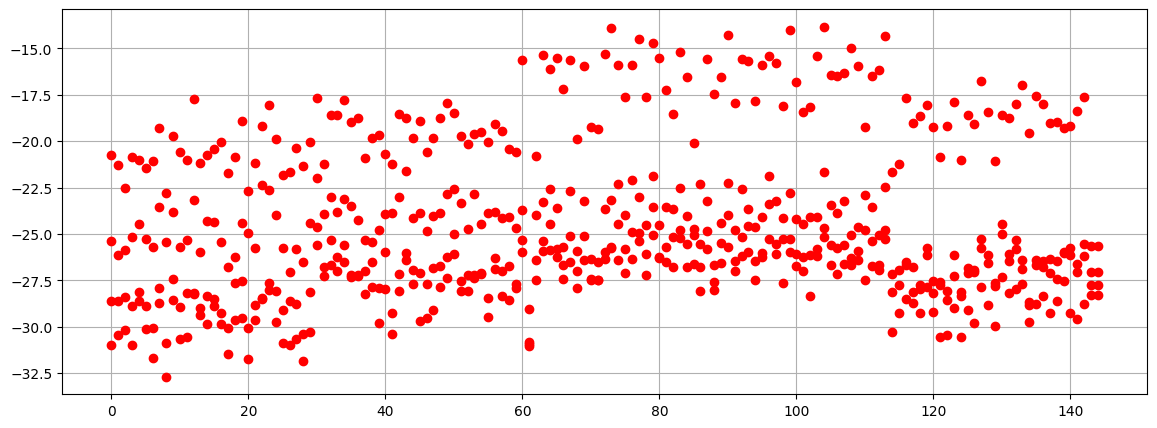

In [15]:
# print
import matplotlib.pylab as plt
# # file = r'uploads\blob.wav'
# audio, rate = librosa.load(file)
# mfcc_feature = mfcc.mfcc(audio, rate, 0.025, 0.01, 20, nfft = 1200, appendEnergy = True) 
# print(max(mfcc_feature[0][:]) )

# # n0 = 1000
# n1 = 1100
plt.figure(figsize=(14, 5))
plt.plot(y[:] , 'ro')
# plt.plot(y[0][0],"ro" )
# plt.plot(y[0][1],"ro" )
# plt.plot(y[0][2],"ro" )
# plt.plot(y[0][3],"ro" )
# plt.plot(x_1  ,'r')
plt.grid()
plt.show()